In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.network import Network
from src.data import Data

In [2]:
X = np.transpose(np.genfromtxt("xorig.csv", delimiter=","))
Y = np.transpose(np.genfromtxt("torig.csv", delimiter=","))
N = 13

In [3]:
K_range = [3, 5, 7]
ntrain = 20
errors = []

for K in K_range:
    batch_errors = []
    for _ in range(ntrain): 
        network = Network(N, K=K, init_v=1/K, gradient_v=True)
        train, test = Data.sample(X, Y, P=200, Q=52)
        error = network.train(train, test, t_max=200)
        batch_errors.append(error)
    errors.append(batch_errors)

In [4]:
# plot_errors = list(map(lambda x: x[0], errors))
plot_errors = np.mean(errors, axis=1)

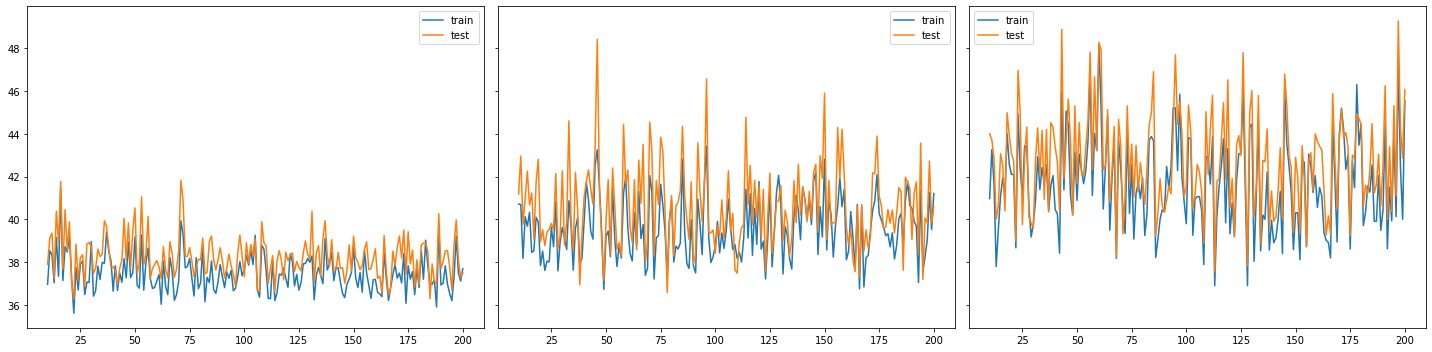

In [5]:
fig, plots = plt.subplots(1, len(K_range), figsize=(20, 5), sharey=True)

for plot, (train_error, test_error) in zip(plots, plot_errors):
    plot.plot(np.arange(len(train_error))[10:], train_error[10:], label="train")
    plot.plot(np.arange(len(test_error))[10:], test_error[10:], label="test")
    plot.legend()

plt.tight_layout()